In [16]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import pickle
from CONSTANTS import *
from Utils.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pickle

# Loop over the years and create the KL divergence plots
gmm = {}
for i, year in tqdm(enumerate([2004, 2007, 2010, 2013, 2016, 2019])):
    kl_list = []
    for tau in taus:
        mode = "normalized"
        with open(f"{path}Correlations/corr_res_{year}_{tau}.pkl", "rb") as f:
            response = pickle.load(f)
            correlation_matrix = response[mode]
            indices = np.triu_indices_from(correlation_matrix, k=1)
            real_series = correlation_matrix[indices]
            x = real_series.flatten()
            f = np.ravel(x).astype(float)
            f=f.reshape(-1,1)
            dict_of_gmm = gmm_fit(f, n_components = 2)
            gmm[str(year) + "_" + str(tau)] = dict_of_gmm

6it [02:39, 26.53s/it]


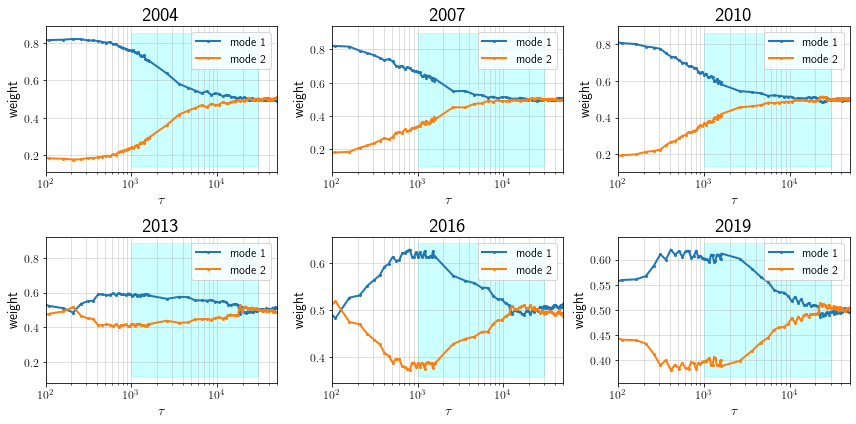

In [22]:
# Define the number of rows and columns for the subplots
nrows = 2
ncols = 3

# Create the figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
# Set the text font to use LaTeX
plt.rc('text', usetex=True)

for i, year in enumerate([2004, 2007, 2010, 2013, 2016, 2019]):
    
    w1_list = []
    w2_list = []
    
    for tau in taus:
        
        gmm_res = gmm[str(year) + "_" + str(tau)]
        
        min_index = np.argmin(gmm_res["stds"])
        max_index = np.argmax(gmm_res["stds"])
        
        weight_1 = gmm_res["weights"][min_index]
        weight_2 = gmm_res["weights"][max_index]

        w1_list.append(weight_1)
        w2_list.append(weight_2)
    
    row_idx = i // ncols
    col_idx = i % ncols

    # Plot the KL divergence matrix in the appropriate subplot
    ax = axes[row_idx][col_idx]
    ax = plot([taus, taus], [w1_list, w2_list], ["mode 1", "mode 2"], r"$\tau$", "weight", f"{year}", highlight_x = (1000, 30000), dpi=300, log_x = True, log_y = False, axes = ax, plot_gmm=True) 

plt.tight_layout()
plt.savefig("gmm.pdf", bbox_inches='tight')
plt.show()
        